In [1]:
from utils import *
features, labels, handles = initial_processing("default_of_credit_card_clients.xls")
"""
Lets already get rid of redundant features 
Using a threshold ϵ = 0.95, such that
above it, features with cov > ϵ get selected
and the one with the lowest KW score gets eliminated
"""
features = redundancy_check(features, 0.95, labels)
classifiers = ["euclidean", "mahalanobis"]

In [2]:
#"Vanilla" 
for classifier in classifiers:
    run(features, labels, 25, 0.7, 0.15, classifier = classifier)

Training error: 0.4653 ± 0.0026
Validation error: 0.4636 ± 0.0094
Execution time: 149.96
Training error: 0.2988 ± 0.0031
Validation error: 0.3007 ± 0.0076
Execution time: 146.42


In [4]:
# with PCA (kaiser)
run(PCA(features, kaiser), labels, 25, 0.7, 0.15, classifier = "euclidean")

Training error: 0.3713 ± 0.0025
Validation error: 0.3690 ± 0.0071
Execution time: 112.73


In [5]:
# with PCA (scree, ϵ = 1e-1)
run(PCA(features, scree), labels, 25, 0.7, 0.15, classifier = "euclidean")

Training error: 0.3614 ± 0.0030
Validation error: 0.3590 ± 0.0096
Execution time: 114.89


In [6]:
# With Fisher LDA
run(LDA(features, labels), labels, 25, 0.7, 0.15, classifier = "euclidean")

Training error: 0.2781 ± 0.0026
Validation error: 0.2781 ± 0.0062
Execution time: 103.50


Training error: 0.2780 ± 0.0018
Validation error: 0.2780 ± 0.0058
Testing error: 0.2712
In the form:
[TP FN
FP TN]
Confusion matrix: [[ 329  772]
 [ 897 6230]]
Accuracy: 0.7972
Precision: 0.2684
Sensitivity: 0.2988
Specificity: 0.8741
F1 score: 0.2828
AUC: 0.7191
Execution time: 102.90


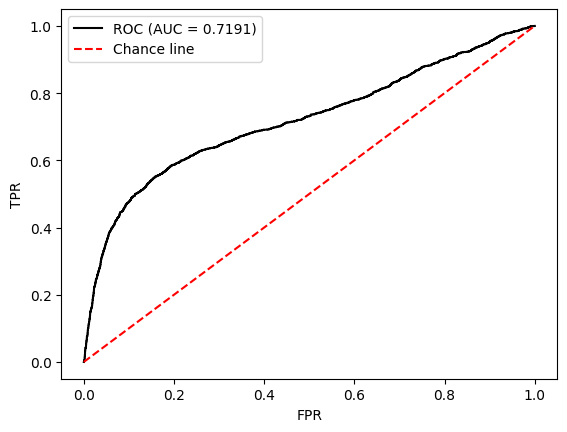

In [7]:
"""
Based on these results, we'll use Fisher LDA
to check with the testing dataset, as it had
the lowest validation errors
"""
run(LDA(features, labels), labels, 25, 0.7, 0.15, classifier = "euclidean",
   testing=True, plot=True)